# Obsevation No.1
### We can see that the weight of the mouse and the tumor volume are related, if the mouse is heavy the tumor volume tends to be bigger 

# Observation No.2

### We can see in the results of the mouse b128 the behaivor of the line plot how the tumor volume tends to decrease each 10 timepoints

# Observation No.3

### Infubinol has one outlier, it would be interesting analyze that particular mouse to try to figure it out why the tumor volume is to low

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

mouse_metadata = pd.read_csv("./data/Mouse_metadata.csv")
study_results = pd.read_csv("./data/Study_results.csv")

In [2]:
data = study_results.merge(mouse_metadata, on=['Mouse ID'])

In [3]:
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [4]:
data['Mouse ID'].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
data['Mouse ID'].unique()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [7]:
data.loc[data.duplicated(subset=['Mouse ID', 'Timepoint']), :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
filtro = data['Mouse ID']=='g989'

In [9]:
data[filtro]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
data = data[data['Mouse ID'] != 'g989']

In [11]:
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [12]:
data['Mouse ID'].value_counts()

b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

In [13]:
data = data.reset_index()
data

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,Capomulin,Female,9,22
3,3,b128,15,43.784893,0,Capomulin,Female,9,22
4,4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...,...
1875,1888,m601,25,33.118756,1,Capomulin,Male,22,17
1876,1889,m601,30,31.758275,1,Capomulin,Male,22,17
1877,1890,m601,35,30.834357,1,Capomulin,Male,22,17
1878,1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [14]:
del data['index']

In [15]:
data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [16]:
data['Drug Regimen'].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [17]:
mean = pd.DataFrame(data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
mean = mean.rename(columns={'Tumor Volume (mm3)':'mean'})
mean

,mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [18]:
median = pd.DataFrame(data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
median = median.rename(columns={'Tumor Volume (mm3)':'median'})
median

,median
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [19]:
variance = pd.DataFrame(data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
variance = variance.rename(columns={'Tumor Volume (mm3)':'var'})
variance

,var
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [20]:
standard = pd.DataFrame(data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
standard = standard.rename(columns={'Tumor Volume (mm3)':'std'})
standard

,std
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [21]:
Sem = pd.DataFrame(data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
Sem = Sem.rename(columns={'Tumor Volume (mm3)':'sem'})
Sem

,sem
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [22]:
data1 = mean.merge(median, on=['Drug Regimen'])
data2 = data1.merge(variance, on=['Drug Regimen'])
data3 = data2.merge(standard, on=['Drug Regimen'])
new_data = data3.merge(Sem, on=['Drug Regimen'])
new_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
count = pd.DataFrame(data['Drug Regimen'].value_counts())
count = count.reset_index()
count

,index,Drug Regimen
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


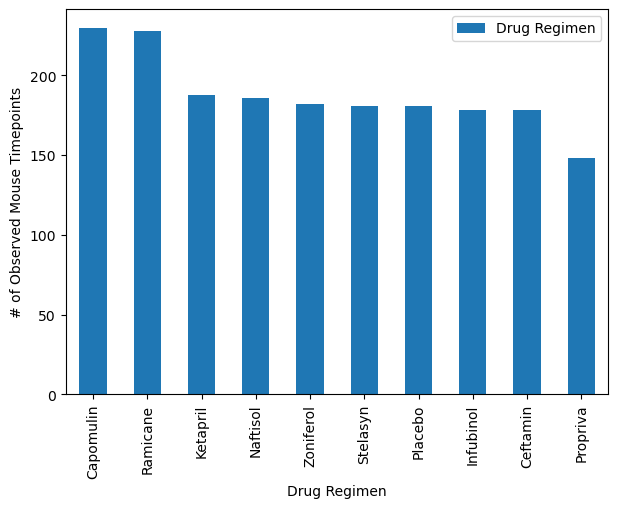

In [24]:
(
    pd
    .DataFrame(data
    ['Drug Regimen']
    .value_counts())
    .plot(kind='bar', figsize=[7,5])
)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

In [25]:
counter = np.array(data['Drug Regimen'].value_counts())
counter

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

In [26]:
drugs = np.array(data['Drug Regimen'].unique())
drugs

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

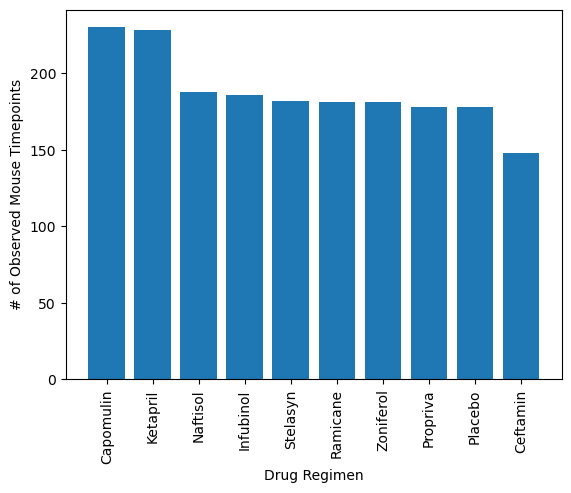

In [27]:
barplot = plt.bar(drugs, counter)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

In [28]:
genders = np.array(data['Sex'].unique())
genders

array(['Female', 'Male'], dtype=object)

In [29]:
genderframe = pd.DataFrame(data['Sex'].value_counts())
genderframe

,Sex
Male,958
Female,922


<Axes: ylabel='Sex'>

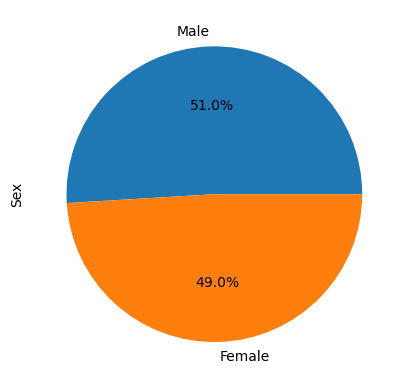

In [30]:
data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [31]:
labels = ['Male', 'Female']
sizes = np.array(genderframe['Sex'])
colors = ["#19A7CE", "#F45050"]

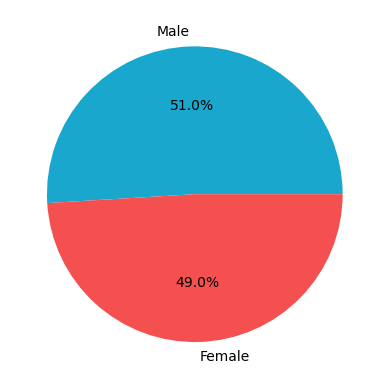

In [32]:
plt.pie(sizes, labels=labels, colors=colors, autopct = '%1.1f%%')
plt.show()

In [33]:
filtroCapomulin = data['Drug Regimen']=='Capomulin'
capo = data[filtroCapomulin]

In [34]:
capo['Tumor Volume (mm3)'].describe()

count    230.000000
mean      40.675741
std        4.994774
min       23.343598
25%       37.685933
50%       41.557809
75%       45.000000
max       48.158209
Name: Tumor Volume (mm3), dtype: float64

In [36]:
mouses = pd.DataFrame(data.groupby('Mouse ID')['Timepoint'].max())
mouses

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [37]:
data_drug = mouses.merge(data, on=['Mouse ID', 'Timepoint'])
data_drug

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [43]:
filtro = data_drug['Drug Regimen']=='Capomulin'
capomulin = data_drug[filtro]
filtro2 = data_drug['Drug Regimen']=='Ramicane'
ramicane = data_drug[filtro2]
filtro3 = data_drug['Drug Regimen']=='Infubinol'
infubinol = data_drug[filtro3]
filtro4 = data_drug['Drug Regimen']=='Ceftamin'
ceftamin = data_drug[filtro4]
infubinol['Tumor Volume (mm3)'].describe()

count    25.000000
mean     58.178246
std       8.602957
min      36.321346
25%      54.048608
50%      60.165180
75%      65.525743
max      72.226731
Name: Tumor Volume (mm3), dtype: float64

In [44]:
statistics = capomulin['Tumor Volume (mm3)'].describe()
statistics2 = ramicane['Tumor Volume (mm3)'].describe()
statistics3 = infubinol['Tumor Volume (mm3)'].describe()
statistics4 = ceftamin['Tumor Volume (mm3)'].describe()

q1 = statistics['25%']
q3 = statistics['75%']
rq1 = statistics2['25%']
rq3 = statistics2['75%']
iq1 = statistics3['25%']
iq3 = statistics3['75%']
cq1 = statistics4['25%']
cq3 = statistics4['75%']

iqr = q3 - q1
riqr = rq3 - rq1
iiqr = iq3 - iq1
ciqr = cq3 - cq1

lower_bound = q1 - (iqr*1.5)
upper_bound = q3 + (iqr*1.5)
lower_bound2 = rq1 - (riqr*1.5)
upper_bound2 = rq3 + (riqr*1.5)
lower_bound3 = iq1 - (iiqr*1.5)
upper_bound3 = iq3 + (iiqr*1.5)
lower_bound4 = cq1 - (ciqr*1.5)
upper_bound4 = cq3 + (ciqr*1.5)


filtered_data = capomulin[
    (capomulin['Tumor Volume (mm3)']>lower_bound) & (capomulin['Tumor Volume (mm3)']<upper_bound)
]
filtered_data2 = ramicane[
    (ramicane['Tumor Volume (mm3)']>lower_bound2) & (ramicane['Tumor Volume (mm3)']<upper_bound2)
]
filtered_data3 = infubinol[
    (infubinol['Tumor Volume (mm3)']>lower_bound3) & (infubinol['Tumor Volume (mm3)']<upper_bound3)
]
filtered_data4 = ceftamin[
    (ceftamin['Tumor Volume (mm3)']>lower_bound4) & (ceftamin['Tumor Volume (mm3)']<upper_bound4)
]

In [45]:
capomulin = capomulin['Tumor Volume (mm3)'].reset_index()
ramicane = ramicane['Tumor Volume (mm3)'].reset_index()
infubinol = infubinol['Tumor Volume (mm3)'].reset_index()
ceftamin = ceftamin['Tumor Volume (mm3)'].reset_index()


In [152]:
infubinoll = infubinol.set_index('index')

In [178]:
data_infubinol = filtered_data3.merge(infubinoll, how='outer')
data_infubinol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45.0,67.973419,2.0,Infubinol,Female,20.0,23.0
1,a251,45.0,65.525743,1.0,Infubinol,Female,21.0,25.0
2,a577,30.0,57.031862,2.0,Infubinol,Female,6.0,25.0
3,a685,45.0,66.083066,3.0,Infubinol,Male,8.0,30.0
4,c139,45.0,72.226731,2.0,Infubinol,Male,11.0,28.0
5,c895,30.0,60.969711,2.0,Infubinol,Female,7.0,29.0
6,e476,45.0,62.435404,1.0,Infubinol,Male,23.0,26.0
7,f345,45.0,60.918767,1.0,Infubinol,Male,23.0,26.0
8,i386,40.0,67.289621,4.0,Infubinol,Female,23.0,29.0
9,k483,45.0,66.196912,3.0,Infubinol,Female,20.0,30.0


In [188]:
new_infubinol = data_drug[filtro3]
flt_outlier = new_infubinol['Tumor Volume (mm3)']==36.3213458
outlier = new_infubinol[flt_outlier]
outlier

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
31,c326,5,36.321346,0,Infubinol,Female,18,25


In [192]:
response = outlier['Tumor Volume (mm3)']
print (f'Infubinol potential outliers: {response}')

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


<Axes: >

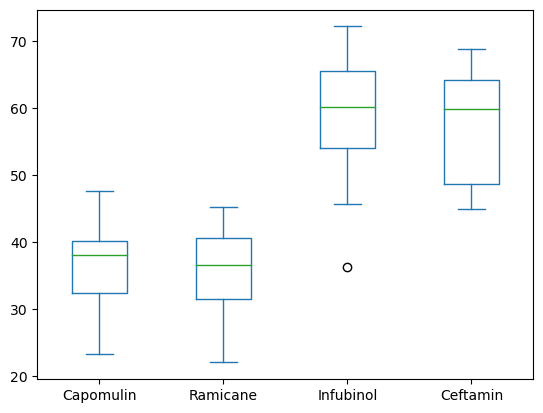

In [46]:
df2 = pd.DataFrame().assign(Capomulin=capomulin['Tumor Volume (mm3)'],
                            Ramicane=ramicane['Tumor Volume (mm3)'],
                            Infubinol=infubinol['Tumor Volume (mm3)'],
                            Ceftamin=ceftamin['Tumor Volume (mm3)'])
df2.plot.box()

In [47]:
mouse_filter = data['Mouse ID']== 'b128'
one_mouse = data[mouse_filter]
one_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


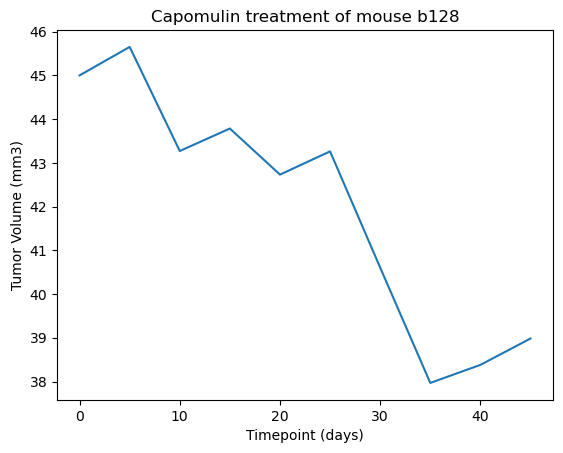

In [48]:
plt.plot(one_mouse['Timepoint'], one_mouse['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse b128')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show()

In [49]:
capomu = data_drug[filtro]
capomu

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22
80,i557,45,47.685963,1,Capomulin,Female,1,24
83,i738,45,37.311846,2,Capomulin,Female,23,20
85,j119,45,38.125164,1,Capomulin,Female,7,23
87,j246,35,38.753265,1,Capomulin,Female,21,21
108,l509,45,41.483008,3,Capomulin,Male,17,21


In [50]:
y = capo.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
x = capomu['Weight (g)']

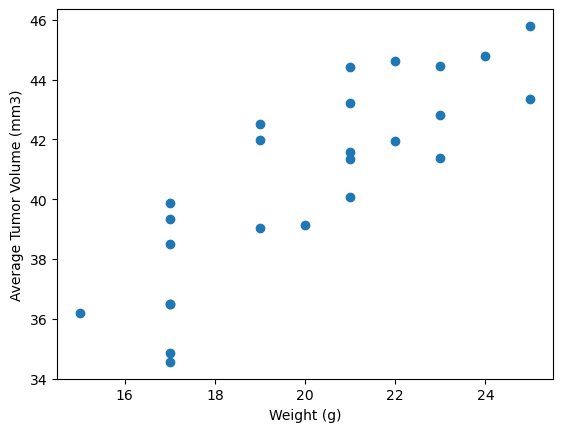

In [51]:
plt.scatter(x,y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

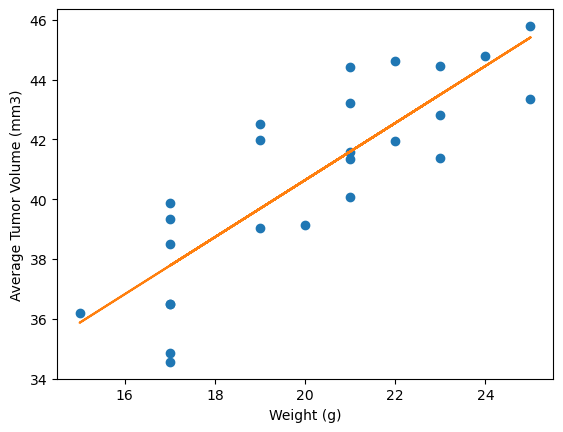

In [115]:
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

In [132]:
print(f'The correlation between mouse weight and the average tumor volume is {corr}')

The correlation between mouse weight and the average tumor volume is 0.84


In [125]:
xx = np.array(x)
yy = np.array(y)
xy = pd.DataFrame({'Weight' : xx,'Average Tumor' : yy})

In [126]:
xy

,Weight,Average Tumor
0,22,41.963636
1,21,40.083699
2,17,36.505973
3,19,41.990097
4,22,44.613344
5,24,44.805810
6,20,39.141053
7,23,44.465236
8,21,43.216925
9,21,44.434474


In [131]:
corr = xy['Weight'].corr(xy['Average Tumor']).round(2)
corr

0.84